In [1]:
import sys

sys.path.append("../../")
sys.path.append("/home/ferroelectric/m3_learning/m3_learning/src")

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset
from m3_learning.be.nn import SHO_fit_func_nn, SHO_Model

printing = printer(basepath = './Figures/')


set_style("printing")
random_seed(seed=42)

%matplotlib inline

2023-05-17 20:23:11.530338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 20:23:11.667025: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-17 20:23:12.322485: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/cv2/../../lib64:
2023-05-17 20:23:12.322539: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libr

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


In [3]:
# Specify the filename and the path to save the file
filename = "data_raw_SHO.h5"
save_path = "./Data"


data_path = save_path + "/" + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, resample_bins=None, SHO_fit_func_NN=SHO_fit_func_nn)

# print the contents of the file
dataset.print_be_tree()

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Noisy_Data_1
    ├ Noisy_Data_2
    ├ Noisy_Data_3
    ├ Noisy_Data_4
    ├ Noisy_Data_5
    ├ Noisy_Data_6
    ├ Noisy_Data_7
    ├ Noisy_Data_8
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
├ Noisy_Data_1_SHO_Fit
  --------

In [4]:
BE_viz = Viz(dataset, printing, verbose=True)

In [30]:
state = {
    "fitter": "LSQF",
    "raw_format": "magnitude spectrum",
    "resampled": True,
    "scaled": True,
    "output_shape": "pixels",
}

./Figures/Noise test.png
./Figures/Noise test.svg


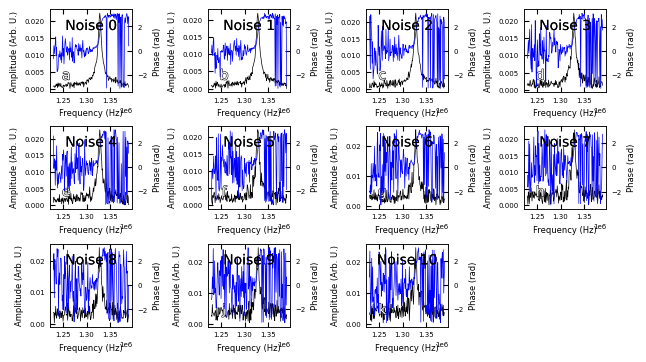

In [40]:
BE_viz.noisy_datasets(state, filename = "Noise test")

In [4]:
dataset.NN_data



In [54]:
def viz_noise_hist(path, noise_level):

    # instantiate the model
    model = SHO_Model(dataset, training=False, model_basename="SHO_Fitter_original_data")

    filename = path + '/' + get_lowest_loss_for_noise_level(path, noise_level)

    model.load(filename)

    # we will add the appropriate phase shift to the dataset based on the fix seed,
    # If your seed is different the results might vary
    dataset.NN_phase_shift = np.pi/2 
    dataset.noise = noise_level

    X_data, Y_data = dataset.NN_data()

    # you can view the test and training dataset by replacing X_data with X_test or X_train
    pred_data, scaled_param, parm = model.predict(X_data)

    parm = dataset.SHO_scaler.transform(parm)
    

    BE_viz.SHO_hist(parm, filename="Figure_13_NN_Unscaled_Parameters_Histograms")
    BE_viz.SHO_hist(Y_data, filename="Figure_13_NN_Unscaled_Parameters_Histograms")

In [7]:
path = "/home/ferroelectric/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter"

from m3_learning.be.viz import get_lowest_loss_for_noise_level

# instantiate the model
model = SHO_Model(dataset, training=False, model_basename="SHO_Fitter_original_data")

filename = path + '/' + get_lowest_loss_for_noise_level(path, 1)

model.load(filename)

Using GPU NVIDIA GeForce RTX 3090


In [8]:
X_data, Y_data = dataset.NN_data()

# you can view the test and training dataset by replacing X_data with X_test or X_train
pred_data, scaled_param, parm = model.predict(X_data)


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = None
    Noise Level = 0
                  
None


array([1229492.2, 1230468.8, 1231445.2, 1232421.9, 1233398.5, 1234375. ,
       1235351.5, 1236328.1, 1237304.8, 1238281.2, 1239257.8, 1240234.4,
       1241211. , 1242187.5, 1243164. , 1244140.6, 1245117.2, 1246093.8,
       1247070.2, 1248046.9, 1249023.5, 1250000. , 1250976.5, 1251953.1,
       1252929.8, 1253906.2, 1254882.8, 1255859.4, 1256836. , 1257812.5,
       1258789. , 1259765.6, 1260742.2, 1261718.8, 1262695.2, 1263671.9,
       1264648.5, 1265625. , 1266601.5, 1267578.1, 1268554.8, 1269531.2,
       1270507.8, 1271484.4, 1272461. , 1273437.5, 1274414. , 1275390.6,
       1276367.2, 1277343.8, 1278320.2, 1279296.9, 1280273.5, 1281250. ,
       1282226.5, 1283203.1, 1284179.8, 1285156.2, 1286132.8, 1287109.4,
       1288086. , 1289062.5, 1290039. , 1291015.6, 1291992.2, 1292968.8,
       1293945.2, 1294921.9, 1295898.5, 1296875. , 1297851.5, 1298828.1,
       1299804.8, 1300781.2, 1301757.8, 1302734.4, 1303711. , 1304687.5,
       1305664. , 1306640.6, 1307617.2, 1308593.8, 

In [51]:
from m3_learning.be.nn import SHO_fit_func_nn
import matplotlib.pyplot as plt

pred_test = SHO_fit_func_nn(parm, dataset.get_freq_values(165))


In [50]:
parm[:,2] = -200

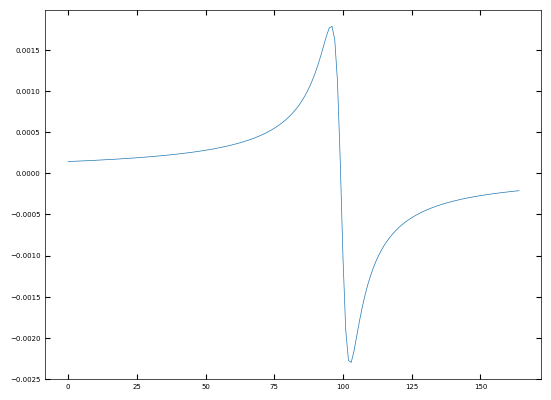

In [52]:
i = np.random.randint(0, X_data.shape[0])

plt.plot(pred_test[i])
# pred_data = dataset.raw_data_scaler.inverse_transform(pred_data)
# x_data_ = dataset.raw_data_scaler.inverse_transform(X_data)

# plt.plot(pred_data[i])
# plt.plot(x_data_[i])

In [32]:
pred_data.shape

torch.Size([1382400, 165])

tensor([ 7.4066e-05,  1.3195e+06,  1.0000e-01, -1.5821e+00])


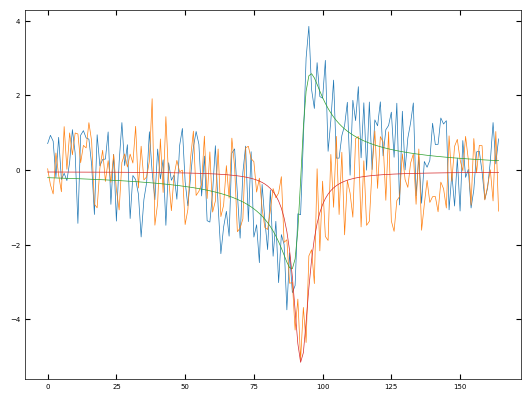

In [37]:
import matplotlib.pyplot as plt

i = np.random.randint(0, X_data.shape[0])

plt.plot(X_data[i])
plt.plot(pred_data[i])
parm[i,2] = .1~
print(parm[i])

In [53]:

path = "/home/ferroelectric/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter"

viz_noise_hist(path, 0)

NameError: name 'viz_noise_hist' is not defined

In [16]:
a, b = viz_noise_hist(path, 1)

Using GPU NVIDIA GeForce RTX 3090

    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 1
                  
None


ValueError: too many values to unpack (expected 2)

In [ ]:
plt.hist(b, 100)

tensor([[ 9.3847e-06,  1.3159e+06, -1.1939e+02, -1.3083e+00],
        [ 9.5212e-06,  1.3190e+06, -8.0619e+01, -1.5136e+00],
        [ 1.1927e-05,  1.3164e+06, -1.2232e+02, -1.2487e+00],
        ...,
        [ 7.8797e-05,  1.3273e+06, -2.3240e+02,  1.4935e+00],
        [ 7.4063e-05,  1.3271e+06, -2.4629e+02,  1.4313e+00],
        [ 8.0975e-05,  1.3270e+06, -2.4347e+02,  1.4239e+00]])

Using GPU NVIDIA GeForce RTX 3090

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 0
                  
None

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 0
                  
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.png
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.svg

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Res

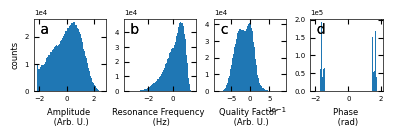

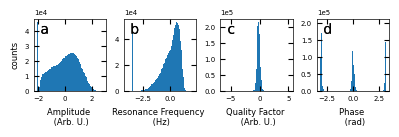

In [55]:
viz_noise_hist(path, 0)

Using GPU NVIDIA GeForce RTX 3090

    Dataset = Noisy_Data_2
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 2
                  
None

    Dataset = Noisy_Data_2
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 2
                  
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.png
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.svg

    Dataset = Noisy_Data_2
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = F

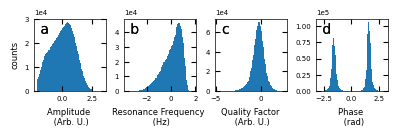

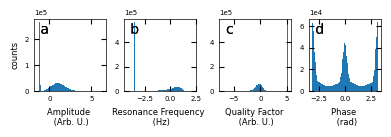

In [56]:
viz_noise_hist(path, 2)

Using GPU NVIDIA GeForce RTX 3090

    Dataset = Noisy_Data_1
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 1
                  
None

    Dataset = Noisy_Data_1
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 1
                  
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.png
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.svg

    Dataset = Noisy_Data_1
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = F

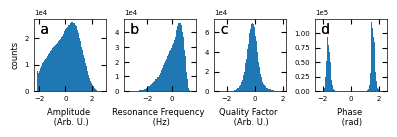

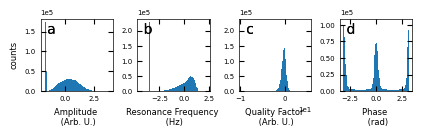

In [57]:
viz_noise_hist(path, 1)

Using GPU NVIDIA GeForce RTX 3090

    Dataset = Noisy_Data_7
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 7
                  
None

    Dataset = Noisy_Data_7
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 7
                  
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.png
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.svg

    Dataset = Noisy_Data_7
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = F

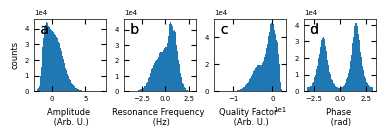

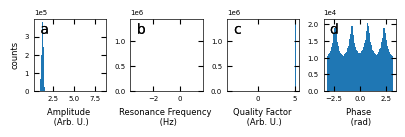

In [20]:
viz_noise_hist(path, 7)

In [21]:
import matplotlib.pyplot as plt
import torch

dataset.noise = 7

X_data, Y_data = dataset.NN_data()


# instantiate the model
model = SHO_Model(dataset, training=False, model_basename="SHO_Fitter_original_data")

filename = path + '/' + get_lowest_loss_for_noise_level(path, 7)

model.load(filename)

# you can view the test and training dataset by replacing X_data with X_test or X_train
pred_data, scaled_param, parm = model.predict(X_data)

parm = dataset.SHO_scaler.transform(parm)



    Dataset = Noisy_Data_7
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 7
                  
None
Using GPU NVIDIA GeForce RTX 3090


In [27]:
dataset.noise = 0
x_data_true, y = dataset.NN_data()


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 0
                  
None


tensor(29.9069)

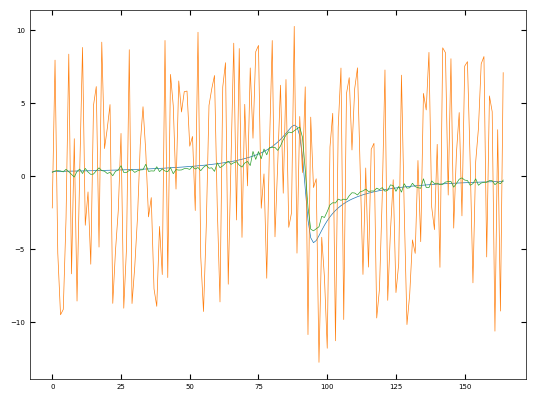

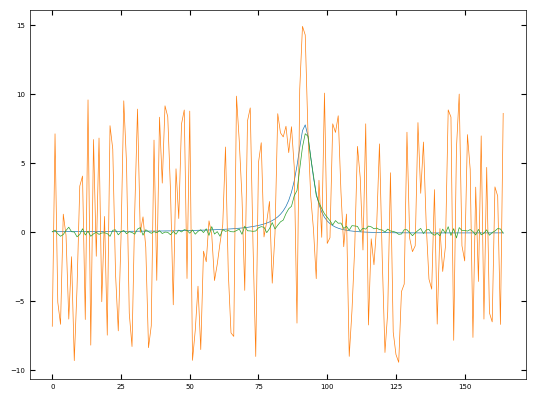

In [42]:


i = np.random.randint(0, 1000000)

plt.plot(pred_data[i,:,0])
plt.plot(X_data[i,:,0])
plt.plot(x_data_true[i,:,0])

plt.figure()
plt.plot(pred_data[i,:,1])
plt.plot(X_data[i,:,1])
plt.plot(x_data_true[i,:,1])

torch.mean((X_data[100,:,0]-pred_data[100,:,0])**2)